In [8]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [9]:
# renomeando
map = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = map)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [10]:
# troca de valores
swap = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(swap)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [11]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [12]:
# visualizar a quantidade de horas esperadas por preco 
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)


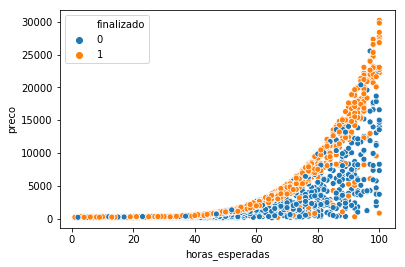

In [14]:
# colore o gráfico de acordo com a coluna "finalizado"
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)


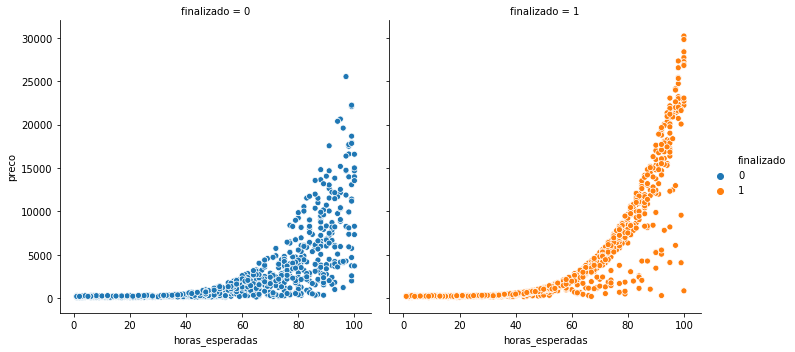

In [17]:
# plot relativo
# ao invés de cores, quero colunas diferentes
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)


In [18]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 9
#np.random.seed(SEE)
# usa o X e o Y pra fazer o split de teste e de treino
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state = SEED, test_size = 0.25, # 25%
                                                    stratify = y) # estratificado
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(x_train), len(x_test)))

modelo = LinearSVC(random_state=SEED) #cria modelo linear (posso passar o random_state=SEED, ele fixo, no LinearSVC())
modelo.fit(x_train, y_train) # treina o modelo 
previsoes = modelo.predict(x_test) # faz predição

acuracia = accuracy_score(y_test, previsoes) * 100  # testa a acurácia
print('A acurácia foi %.2f%%' % acuracia)

SyntaxError: invalid syntax (<ipython-input-54-1c4d6a9bf0a0>, line 9)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 9
np.random.seed(SEED)
# usa o X e o Y pra fazer o split de teste e de treino
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.25, # 25%
                                                    stratify = y) # estratificado
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(x_train), len(x_test)))

modelo = LinearSVC() #cria modelo linear (posso usar o random_state do numpy)
modelo.fit(x_train, y_train) # treina o modelo 
previsoes = modelo.predict(x_test) # faz predição

acuracia = accuracy_score(y_test, previsoes) * 100  # testa a acurácia
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 47.41%


c:\users\snow\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [58]:
import numpy as np
# baseline
baseline = np.ones(540)
acuracia = accuracy_score(y_test, baseline) * 100
print('A acurácia do algoritmo de baseline foi %.2f%%' % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


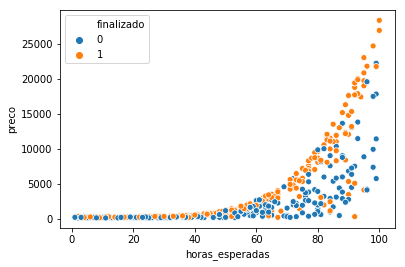

In [59]:
# analisando o teste
sns.scatterplot(x="horas_esperadas", y="preco", hue=y_test, data=x_test)  

In [60]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preco.min()
y_max = x_test.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 101 28398


In [61]:
pixels = 100
eixo_x = np.arange(x_min, x_max,(x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max,(y_max - y_min)/pixels)

In [62]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.811503e+04],
       [9.802000e+01, 2.811503e+04],
       [9.901000e+01, 2.811503e+04]])

In [63]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

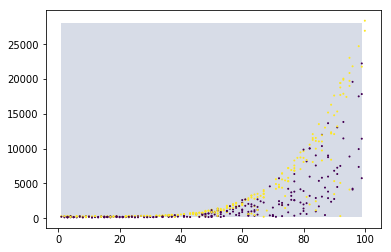

In [64]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(x_test.horas_esperadas, x_test.preco, c = y_test, s = 1)
# decision boundary (curva de decisão)

In [74]:
#
#  utilizando o SVC
#
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 9
np.random.seed(SEED)
# usa o X e o Y pra fazer o split de teste e de treino
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.25, # 25%
                                                    stratify = y) # estratificado
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(x_train), len(x_test)))

modelo = SVC()
modelo.fit(x_train, y_train) # treina o modelo 
previsoes = modelo.predict(x_test) # faz predição

acuracia = accuracy_score(y_test, previsoes) * 100  # testa a acurácia
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos


c:\users\snow\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


A acurácia foi 60.93%


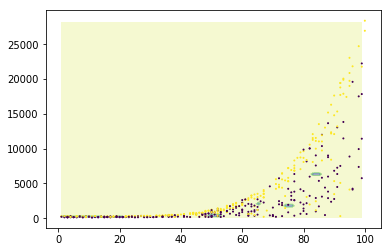

In [75]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preco.min()
y_max = x_test.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max,(x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max,(y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(x_test.horas_esperadas, x_test.preco, c = y_test, s = 1)
# decision boundary (curva de decisão)

In [81]:
#
#  reeascalar para as medidas ficarem similares, e nao de 100/25k
#
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



SEED = 9
np.random.seed(SEED)
# usa o X e o Y pra fazer o split de teste e de treino
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.25, # 25%
                                                    stratify = y) # estratificado
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(x_train), len(x_test)))

# -> pegar os valores de treino x e criar uma escala nova

scaler = StandardScaler() #cria novo escalador
scaler.fit(raw_x_train) #treina-o com base nos valores de treino x
x_train = scaler.transform(raw_x_train) #transforma o treino x em um novo treino x (que já está na escala nova)
x_test = scaler.transform(raw_x_test)

modelo = SVC()
modelo.fit(x_train, y_train) # treina o modelo 
previsoes = modelo.predict(x_test) # faz predição

acuracia = accuracy_score(y_test, previsoes) * 100  # testa a acurácia
print('A acurácia foi %.2f%%' % acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 65.93%


c:\users\snow\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\snow\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
c:\users\snow\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [82]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preco.min()
y_max = x_test.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max,(x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max,(y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(x_test.horas_esperadas, x_test.preco, c = y_test, s = 1)
# decision boundary (curva de decisão)

AttributeError: 'numpy.ndarray' object has no attribute 'horas_esperadas'

In [86]:
#mas agora o x_train é um array de arrays
#enquanto que o raw_x_train é um dataframe do pandas 
x_train

array([[ 0.91598635, -0.01543066],
       [-0.02112081, -0.40719436],
       [-1.5482584 , -0.59820837],
       ...,
       [ 0.846571  ,  0.25152164],
       [ 1.33247842,  1.87231738],
       [ 0.63832497,  0.04979839]])

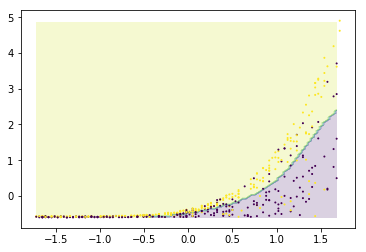

In [90]:
# pegando a primeira coluna pelo numpy
data_x = x_test[:,0] #nosso eixo x
data_y = x_test[:,1] #nosso eixo y

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max,(x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max,(y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(data_x, data_y, c = y_test, s = 1)
# decision boundary (curva de decisão)

In [91]:
#
#  existem diversos estimadores, o LinearSVC e o SVC são baseados no algoritmo "Support Vector Machine"
#  um possui uma restrição de relacionamento linear, pra tentar encontrar decisões lineares (o LinearSVC)-> a curva é uma reta
#  e um que não tem essa restrição (o SVC)
#